In [1]:
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('spam.csv',encoding='cp1252')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4355,ham,Great. So should i send you my account number.,NaN,NaN,NaN
2556,ham,Fuck babe ... What happened to you ? How come ...,NaN,NaN,NaN
4615,ham,ÌÏ called dad oredi...,NaN,NaN,NaN
5379,ham,Somebody set up a website where you can play h...,NaN,NaN,NaN
555,ham,O. Well uv causes mutations. Sunscreen is like...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# data cleaning
# EDA
# test preposeing 
# ṃodel buliding 
# Evoluation
# improment 
# website 
# deploy


### 1.Data cleaning 


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 coloumns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [9]:
df.sample(5)

,v1,v2
780,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
542,ham,But am going to college pa. What to do. are el...
2798,ham,I've told him that i've returned it. That shou...
2757,ham,Yo we are watching a movie on netflix
2709,ham,Sorry de i went to shop.


In [10]:
# renaming the coloumns 
df.rename(columns = {'v1':'target','v2' :'text' },inplace = True)
df.sample(5)

,target,text
1698,spam,"Free msg. Sorry, a service you ordered from 81..."
3888,ham,Unlimited texts. Limited minutes.
364,ham,Good afternoon sunshine! How dawns that day ? ...
739,ham,Haha mayb u're rite... U know me well. Da feel...
3641,ham,My house here e sky quite dark liao... If rain...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])


In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check duplicate values
df.duplicated().sum()

403

In [16]:
# remove duplicate
df= df.drop_duplicates(keep = 'first')

In [17]:
df.shape

(5169, 2)

In [18]:
df.duplicated().sum()

0

### 2. EDA

In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

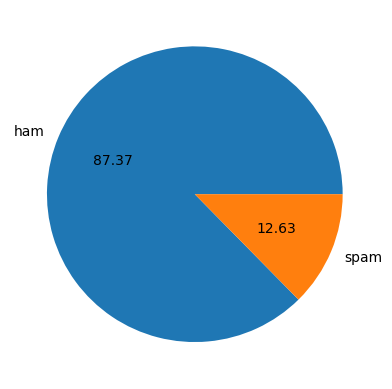

In [21]:
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = "%0.2f")
plt.show()

In [22]:
# data is imbalanced

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# ham
df[df['target'] == 0 ][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# Spam
df[df['target'] == 1 ][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

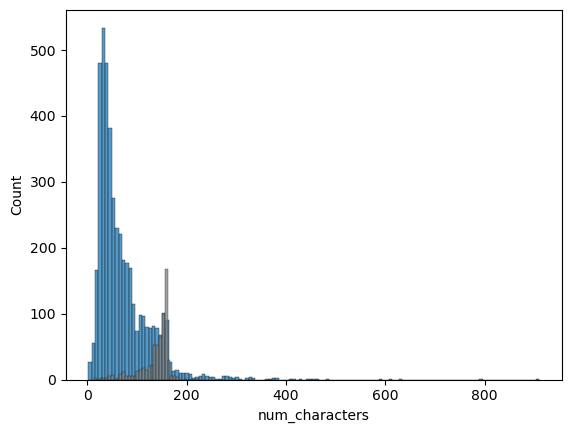

In [35]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'gray')

<Axes: xlabel='num_words', ylabel='Count'>

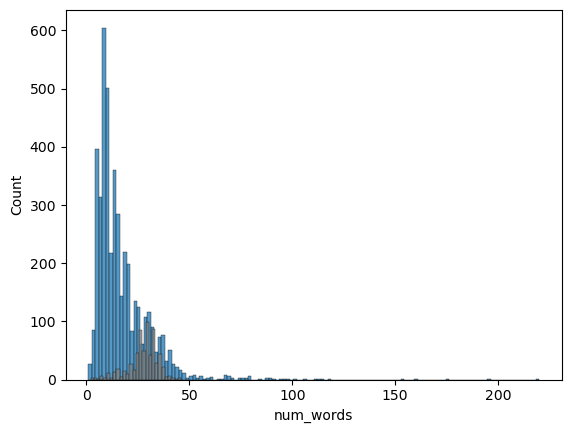

In [36]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color = 'gray')

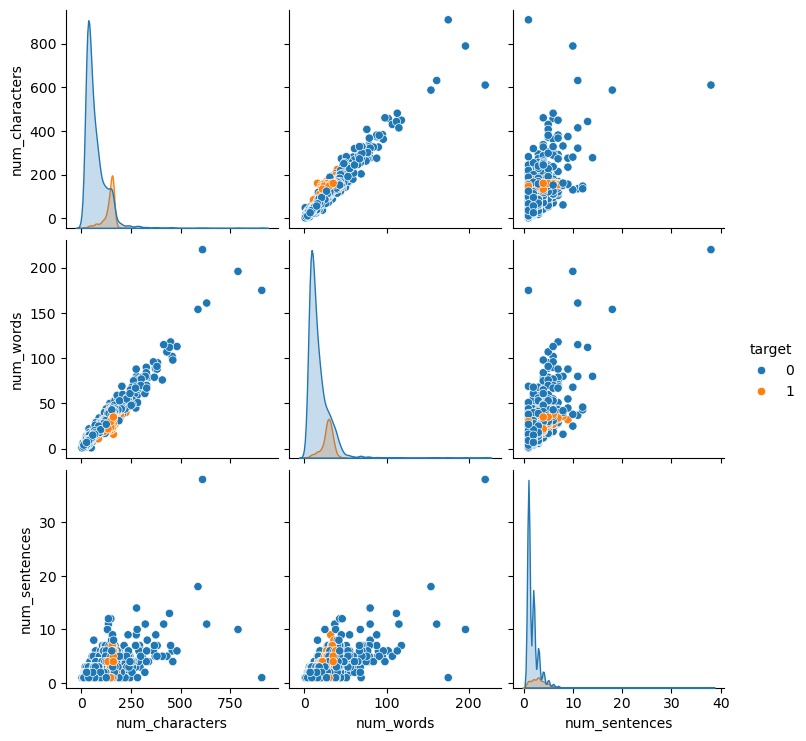

In [37]:
sns.pairplot(df, hue= 'target')

<Axes: >

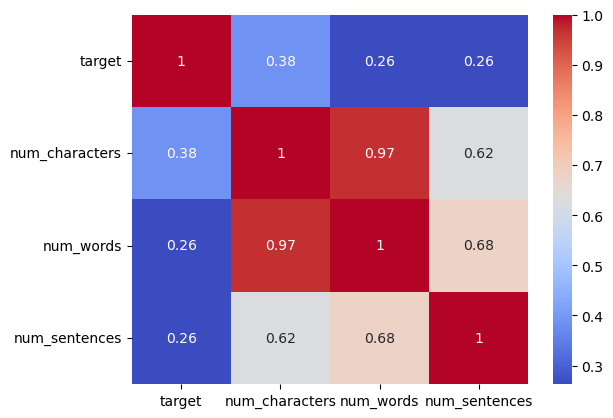

In [38]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')


#### 3. Data PreProcessing
##### .lower case(all upper case word convert lower case )
##### .Tokenization(sprate the words )
##### .Removing Special Characters
##### .Removing stop word and puntuation
##### .Stemming 



In [40]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
import string
from nltk.corpus import stopwords


In [62]:
def trasform_text(text):
    text = text.lower()
    text  = nltk.word_tokenize(text)
    y= []
    for i in text : #remove special charaters
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text : #Removing stop word and puntuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text :
        y.append(ps.stem(i))
                    
    return " ".join(y) 

In [64]:
trasform_text('Go until jurong point, crazy. Available only in bugis n great world la e buffet. Cine there got amore wat...'
)

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [66]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [68]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [70]:
df['tranformed_text'] = df['text'].apply(trasform_text)


In [71]:
df.head()

,target,text,num_characters,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [72]:
pip install wordCloud

In [73]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')


In [74]:
spam_wc = wc.generate(df[df['target'] == 1]['tranformed_text'].str.cat(sep=" "))


            

In [75]:
print(df.columns)


Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'tranformed_text'],
      dtype='object')


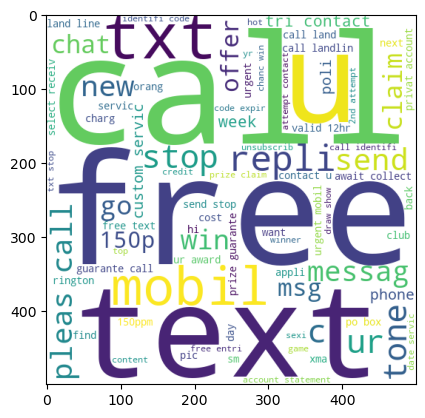

In [76]:
plt.imshow(spam_wc)

In [77]:
ham_wc = wc.generate(df[df['target'] == 0]['tranformed_text'].str.cat(sep = " "))

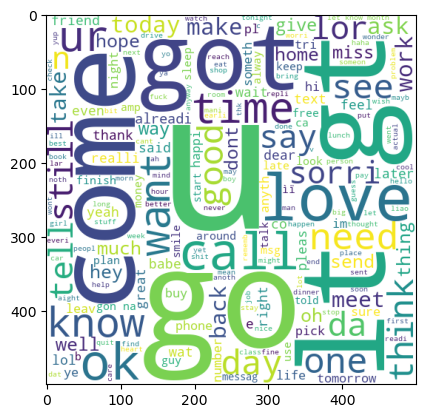

In [78]:
plt.imshow(ham_wc)

In [79]:
df.head()

,target,text,num_characters,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [80]:
spam_corpus = []
for msg in df[df['target'] == 1]['tranformed_text'].tolist():
     for word in msg.split():
         spam_corpus.append(word)

In [81]:
len(spam_corpus)

9939

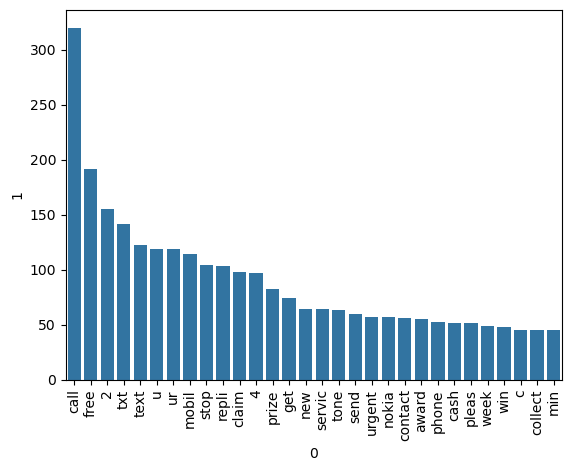

In [82]:

from collections import Counter
common_words = Counter(spam_corpus).most_common(30)
df_common = pd.DataFrame(common_words)

sns.barplot(x=df_common[0], y=df_common[1])
plt.xticks(rotation='vertical')
plt.show()


In [83]:
df.head(5)

,target,text,num_characters,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Model building 

In [85]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf = TfidfVectorizer()


In [86]:
X = tfidf.fit_transform(df['tranformed_text']).toarray()


In [87]:
X.shape

(5169, 6708)

In [88]:
y = df['target'].values

In [89]:
y


array([0, 0, 1, ..., 0, 0, 0])

In [90]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 2)

In [91]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [92]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [93]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [94]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [95]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [96]:
# tfidf- mnb

In [97]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score





In [99]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [100]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [101]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [102]:
train_classifier(svc,X_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, x_test, y_test)

    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy - 0.9729206963249516
Precision - 0.9741379310344828
For KN
Accuracy - 0.9003868471953579
Precision - 1.0
For NB
Accuracy - 0.9593810444874274
Precision - 1.0
For DT
Accuracy - 0.9361702127659575
Precision - 0.8461538461538461
For LR
Accuracy - 0.9516441005802708
Precision - 0.94
For RF
Accuracy - 0.971953578336557
Precision - 1.0


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy - 0.9613152804642167
Precision - 0.9454545454545454


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df ,id_vars = 'Algorithm')

In [ ]:
performance_df1

In [ ]:
sns.catplot(x='algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
